# Importing All Libraries

In [1]:
import pandas as pd
import numpy as np
import scipy

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report, accuracy_score 
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

/var/folders/pj/97rwmxpn6nj_jxn73l92m4vr0000gn/T/ipykernel_68216/4177451177.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


# Import data and very basic EDA

In [2]:
ds = pd.read_csv("music_dataset_mod.csv")

In [3]:
ds.head(10)

,Tempo,Dynamics Range,Vocal Presence,Percussion Strength,String Instrument Detection,Electronic Element Presence,Rhythm Complexity,Drums Influence,Distorted Guitar,Metal Frequencies,Ambient Sound Influence,Instrumental Overlaps,Genre
0,114.618354,57.976367,53.251766,99.061840,14.686768,17.628630,46.545522,75.839434,79.378892,71.753088,96.439665,53.771763,Country
1,116.672803,69.387087,95.787280,90.831033,47.280419,-15.618194,85.421085,100.455908,0.713015,0.000000,17.327295,15.017146,Classical
2,128.328121,52.930677,65.701187,104.439247,5.984994,50.467388,18.006722,77.642913,80.652946,87.692110,95.125207,25.308020,Rock
3,128.511337,25.494755,14.095374,40.106130,47.715584,87.335201,68.603329,63.536557,74.888346,76.239108,97.016998,96.893109,Hip-hop
4,135.474190,45.174876,101.469872,70.002203,108.177637,25.865590,31.295163,81.121030,36.178193,23.381542,53.753793,30.142986,Country
5,125.396416,55.489531,36.660016,42.622754,28.114258,49.198285,20.268958,53.603162,51.719769,46.748945,40.072584,54.253725,Rock
6,126.266289,33.170632,34.431812,31.261415,47.921501,118.172945,13.811310,53.252894,45.404283,50.940339,94.448406,82.865538,Hip-hop
7,102.872722,37.401685,58.255022,65.082390,107.201075,60.415823,68.352576,83.943276,44.401688,52.935285,66.928026,4.293606,Country
8,103.651296,69.983670,98.097303,77.514832,54.307746,17.600221,3.856743,50.365287,70.140810,53.438141,7.108158,1.772224,Country
9,111.256855,41.987729,102.047297,89.803807,93.423110,14.978251,11.667792,80.936464,43.423225,52.918957,44.509521,26.362239,Country


In [4]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Tempo                        1000 non-null   float64
 1   Dynamics Range               1000 non-null   float64
 2   Vocal Presence               1000 non-null   float64
 3   Percussion Strength          1000 non-null   float64
 4   String Instrument Detection  1000 non-null   float64
 5   Electronic Element Presence  1000 non-null   float64
 6   Rhythm Complexity            1000 non-null   float64
 7   Drums Influence              1000 non-null   float64
 8   Distorted Guitar             1000 non-null   float64
 9   Metal Frequencies            1000 non-null   float64
 10  Ambient Sound Influence      1000 non-null   float64
 11  Instrumental Overlaps        1000 non-null   float64
 12  Genre                        890 non-null    object 
dtypes: float64(12), obj

In [5]:
ds.describe()

,Tempo,Dynamics Range,Vocal Presence,Percussion Strength,String Instrument Detection,Electronic Element Presence,Rhythm Complexity,Drums Influence,Distorted Guitar,Metal Frequencies,Ambient Sound Influence,Instrumental Overlaps
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,121.177891,46.684324,51.741685,54.854619,58.442054,48.813244,54.421479,76.646294,47.462577,47.319735,50.858454,49.328441
std,19.600614,17.809545,29.008872,29.489650,29.650752,33.239190,29.606431,18.867990,32.492813,32.274932,29.419584,29.140840
min,50.494818,-4.165724,0.408370,0.598517,0.217449,-29.990605,0.146433,18.995222,0.047202,0.000000,0.008879,0.254396
25%,107.885045,34.252531,26.635663,29.782438,32.240968,22.331010,29.603967,62.916792,11.678634,14.422842,24.832718,23.605648
50%,121.356455,46.390854,52.245242,54.926936,59.366659,49.871999,54.618441,75.739758,52.994852,50.722858,52.400507,50.106840
75%,135.054584,58.481545,76.919814,79.438614,82.872727,75.133776,78.502328,89.973436,75.149865,75.673932,77.304355,75.550700
max,175.982637,104.932942,109.643123,114.949678,119.991892,119.728293,119.699889,140.031079,99.586429,100.000000,99.820903,99.958673


In [6]:
ds.isna().sum()

Tempo                            0
Dynamics Range                   0
Vocal Presence                   0
Percussion Strength              0
String Instrument Detection      0
Electronic Element Presence      0
Rhythm Complexity                0
Drums Influence                  0
Distorted Guitar                 0
Metal Frequencies                0
Ambient Sound Influence          0
Instrumental Overlaps            0
Genre                          110
dtype: int64

In [7]:
ds['Genre'].unique()
ds['Genre'].head(15)

0       Country
1     Classical
2          Rock
3       Hip-hop
4       Country
5          Rock
6       Hip-hop
7       Country
8       Country
9       Country
10    Classical
11      Hip-hop
12      Hip-hop
13          NaN
14         Rock
Name: Genre, dtype: object

<Axes: xlabel='Genre', ylabel='count'>

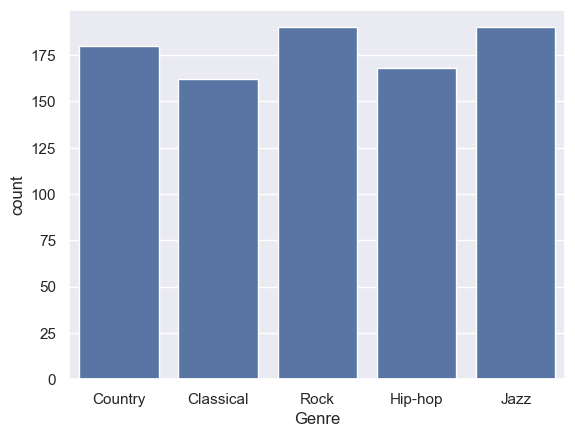

In [8]:
sns.countplot(x='Genre', data=ds)

# Correlation Matrix an Heatmap

In [9]:
correlation = ds.drop('Genre', axis=1)
correlation.corr()

,Tempo,Dynamics Range,Vocal Presence,Percussion Strength,String Instrument Detection,Electronic Element Presence,Rhythm Complexity,Drums Influence,Distorted Guitar,Metal Frequencies,Ambient Sound Influence,Instrumental Overlaps
Tempo,1.000000,-0.028506,0.006061,0.055525,-0.088609,-0.004698,0.031037,0.404134,0.060776,0.049126,0.044593,-0.040985
Dynamics Range,-0.028506,1.000000,0.032957,-0.034168,0.129264,-0.181794,0.037519,-0.016212,-0.361773,-0.353070,-0.024559,0.017175
Vocal Presence,0.006061,0.032957,1.000000,0.018975,-0.049472,0.005875,0.037544,0.059467,0.014141,0.022111,0.017109,-0.053248
Percussion Strength,0.055525,-0.034168,0.018975,1.000000,-0.029019,0.001096,-0.039438,0.535980,0.096691,0.087168,-0.013822,0.025036
String Instrument Detection,-0.088609,0.129264,-0.049472,-0.029019,1.000000,-0.103855,-0.090580,-0.085489,-0.139875,-0.143452,-0.023470,-0.003873
Electronic Element Presence,-0.004698,-0.181794,0.005875,0.001096,-0.103855,1.000000,0.053261,0.043069,0.211275,0.189626,0.035596,-0.053259
Rhythm Complexity,0.031037,0.037519,0.037544,-0.039438,-0.090580,0.053261,1.000000,0.535725,0.037149,0.026348,0.001242,-0.004973
Drums Influence,0.404134,-0.016212,0.059467,0.535980,-0.085489,0.043069,0.535725,1.000000,0.094685,0.078875,0.029679,-0.012037
Distorted Guitar,0.060776,-0.361773,0.014141,0.096691,-0.139875,0.211275,0.037149,0.094685,1.000000,0.965104,0.012690,-0.052988
Metal Frequencies,0.049126,-0.353070,0.022111,0.087168,-0.143452,0.189626,0.026348,0.078875,0.965104,1.000000,0.020836,-0.055322


In [10]:
clean_ds = ds.dropna(subset=['Genre'])
clean_ds.count()

X = clean_ds.drop('Genre', axis=1)
y = clean_ds['Genre']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

/var/folders/pj/97rwmxpn6nj_jxn73l92m4vr0000gn/T/ipykernel_68216/1869995198.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_ds['Genre'] = le.fit_transform(clean_ds['Genre'])


<Axes: >

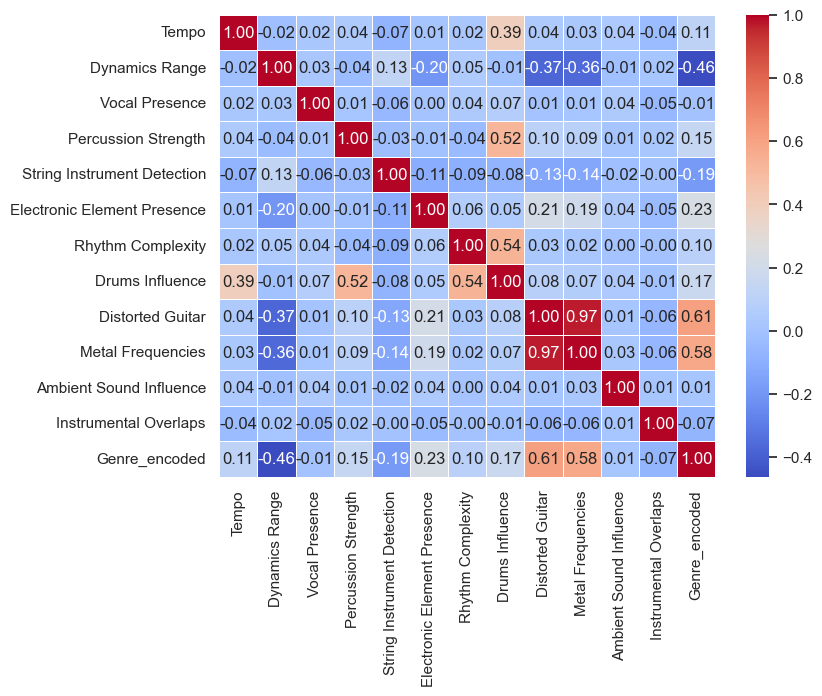

In [11]:
le = LabelEncoder()
clean_ds['Genre'] = le.fit_transform(clean_ds['Genre'])

clean_ds_coded = clean_ds.rename(columns={'Genre': 'Genre_encoded'})

correlation_matrix = clean_ds_coded.corr()

plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

## Standardization

In [12]:
scaler = StandardScaler()

X_scaled = pd.DataFrame(scaler.fit_transform(clean_ds_coded), columns=clean_ds_coded.columns)

X_scaled

,Tempo,Dynamics Range,Vocal Presence,Percussion Strength,String Instrument Detection,Electronic Element Presence,Rhythm Complexity,Drums Influence,Distorted Guitar,Metal Frequencies,Ambient Sound Influence,Instrumental Overlaps,Genre_encoded
0,-0.322764,0.632363,0.053208,1.505236,-1.453223,-0.950834,-0.280198,-0.045318,0.986962,0.764935,1.536339,0.160377,-0.761019
1,-0.218345,1.267916,1.521895,1.223853,-0.364967,-1.952605,1.026807,1.273300,-1.441934,-1.465476,-1.153135,-1.161438,-1.469499
2,0.374045,0.351328,0.483068,1.689070,-1.743763,0.038642,-1.239678,0.051288,1.026300,1.260392,1.491653,-0.810444,1.364421
3,0.383357,-1.176796,-1.298802,-0.510252,-0.350438,1.149519,0.461390,-0.704339,0.848311,0.904381,1.555966,1.631130,-0.052539
4,0.737250,-0.080654,1.718106,0.511789,1.668305,-0.702643,-0.792918,0.237599,-0.346907,-0.738672,0.085206,-0.645537,-0.761019
...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0.652518,-0.196605,1.277574,-0.575573,-1.096662,1.157911,0.663129,0.594055,-0.597699,-0.862764,0.793083,0.345706,-0.052539
886,0.284731,0.623254,1.350035,0.336699,-0.593442,-0.335470,0.380733,1.022344,-1.410049,-1.256308,1.046889,-0.186894,-1.469499
887,0.038769,0.265248,-0.616726,-1.298646,0.877190,-1.080876,-1.544065,-0.675821,1.337705,1.519989,-1.555234,0.870939,1.364421
888,-1.214632,-1.526820,0.378159,-1.104607,0.290702,0.946301,-0.116878,-1.385058,0.651627,0.247874,-1.001716,-0.830619,1.364421


## PCA

In [13]:
pca = PCA()

X_pca = pca.fit_transform(X_scaled)

explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = explained_variance_ratio.cumsum()

explained_variance_ratio
cumulative_explained_variance

array([0.22751256, 0.36680384, 0.4533154 , 0.5336243 , 0.61243344,
       0.68797711, 0.76136209, 0.83164121, 0.8962599 , 0.95285864,
       0.98582542, 0.99744967, 1.        ])

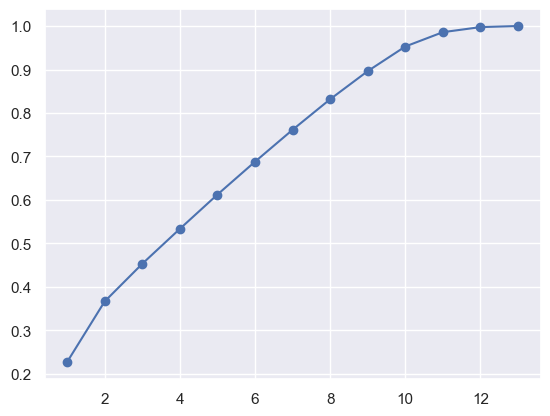

In [14]:
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='-', color='b')

In [15]:
pca = PCA(n_components=8)
X_pca = pd.DataFrame(pca.fit_transform(X_scaled))
X_pca

,0,1,2,3,4,5,6,7
0,-0.540408,0.376661,0.578968,0.807204,-1.324639,1.110423,0.251085,-0.266790
1,2.436608,2.655162,-0.056778,0.904206,1.782891,1.315084,1.096698,0.167653
2,-2.250087,0.109902,0.287783,1.938726,-1.197418,0.252302,0.678006,0.491892
3,-1.385151,-0.901427,-0.258664,-1.403956,-2.226630,-0.683533,-0.855946,-0.470936
4,1.126619,0.546359,0.501021,2.192544,0.426928,0.482913,-0.170778,-0.071722
...,...,...,...,...,...,...,...,...
885,0.101359,1.086086,-2.035732,0.040626,-1.139023,-0.041726,0.586816,0.365691
886,1.883571,1.914860,-1.055145,0.966020,-0.805093,0.591456,0.307366,0.307231
887,-1.094351,-2.208940,1.591031,-0.320212,1.020440,-0.117239,0.478081,-1.955918
888,-1.270075,-2.346953,-0.896144,-0.381515,1.168222,0.102682,0.038155,0.882339


In [16]:
y_encoded = clean_ds_coded['Genre_encoded']

X_pca_train, X_pca_test, y_pca_train, y_pca_test = train_test_split(X_pca, y_encoded, test_size=0.3, random_state=42)

## Logistic Regression Comparison (PCA vs no PCA)

In [17]:
pca_classifier = LogisticRegression(max_iter=10000)
pca_classifier.fit(X_pca_train, y_pca_train)

pca_y_pred = pca_classifier.predict(X_pca_test)

pca_accuracy = accuracy_score(y_pca_test, pca_y_pred)
pca_accuracy

0.5917602996254682

In [18]:
pca_class_report = classification_report(y_pca_test, pca_y_pred)
print(pca_class_report)

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        51
           1       0.49      0.52      0.50        52
           2       0.47      0.44      0.45        48
           3       0.40      0.34      0.37        62
           4       0.61      0.70      0.66        54

    accuracy                           0.59       267
   macro avg       0.59      0.60      0.59       267
weighted avg       0.58      0.59      0.58       267



In [19]:
reg_classifier = LogisticRegression(max_iter=10000)
reg_classifier.fit(X_train, y_train)

reg_y_pred = reg_classifier.predict(X_test)

reg_accuracy = accuracy_score(y_test, reg_y_pred)
reg_accuracy

0.5318352059925093

In [20]:
reg_class_report = classification_report(y_test, reg_y_pred)
print(reg_class_report)

              precision    recall  f1-score   support

   Classical       0.86      0.98      0.92        51
     Country       0.34      0.27      0.30        52
     Hip-hop       0.44      0.46      0.45        48
        Jazz       0.44      0.39      0.41        62
        Rock       0.50      0.59      0.54        54

    accuracy                           0.53       267
   macro avg       0.52      0.54      0.52       267
weighted avg       0.51      0.53      0.52       267



## Predict Missing Genres
### (We will be using the PCA model because it produced a higher accuracy)

In [21]:
predict = ds[ds['Genre'].isna()]
predict

,Tempo,Dynamics Range,Vocal Presence,Percussion Strength,String Instrument Detection,Electronic Element Presence,Rhythm Complexity,Drums Influence,Distorted Guitar,Metal Frequencies,Ambient Sound Influence,Instrumental Overlaps,Genre
13,104.389822,65.826509,45.855410,55.655533,76.058845,55.625315,25.312585,59.202818,0.920308,0.000000,94.308889,27.441046,NaN
18,101.367152,47.843370,93.230347,67.101777,20.932163,50.772288,30.348312,62.950165,64.462755,68.971944,21.690071,94.717315,NaN
22,85.130539,55.707108,81.149615,21.473425,14.959208,61.017283,64.000152,43.332846,70.455879,79.053598,20.420619,99.499498,NaN
31,121.100952,71.769727,49.609529,82.539647,47.670106,119.460607,68.812707,83.727876,95.307620,95.779062,2.883916,19.230684,NaN
42,93.546825,44.563761,56.587554,99.546134,109.735122,30.128106,48.392807,81.888793,97.200948,100.000000,16.380240,55.483399,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
991,130.719110,65.990957,21.775950,91.817048,34.029452,105.525736,28.552899,99.587397,1.414556,0.000000,59.447447,74.901837,NaN
992,117.892313,35.001524,76.506358,77.972570,80.765657,13.759213,59.985923,80.108786,93.831262,100.000000,15.851851,47.984445,NaN
993,104.315096,26.173723,3.334345,42.132602,38.434513,66.522798,62.051560,79.475348,61.390214,52.925363,50.383816,52.630256,NaN
994,121.863373,50.872678,70.100162,106.212013,66.573813,89.927526,3.009635,79.634816,15.398297,31.235519,11.997421,57.281283,NaN


In [22]:
t_predict = predict.drop('Genre', axis=1)

In [23]:
pca_scaler = StandardScaler()

t_standard = pd.DataFrame(pca_scaler.fit_transform(t_predict), columns=t_predict.columns)

t_standard

,Tempo,Dynamics Range,Vocal Presence,Percussion Strength,String Instrument Detection,Electronic Element Presence,Rhythm Complexity,Drums Influence,Distorted Guitar,Metal Frequencies,Ambient Sound Influence,Instrumental Overlaps
0,-0.982462,1.130086,-0.209743,0.071614,0.585835,0.294444,-0.905425,-0.842475,-1.414409,-1.479872,1.599752,-0.874419
1,-1.143156,0.040145,1.409530,0.438623,-1.464656,0.148920,-0.725927,-0.658141,0.500348,0.614528,-0.893348,1.578631
2,-2.006344,0.516758,0.996611,-1.024390,-1.686826,0.456128,0.473590,-1.623131,0.680942,0.920667,-0.936930,1.753000
3,-0.094046,1.490298,-0.081428,0.933617,-0.470112,2.208622,0.645133,0.363930,1.429812,1.428552,-1.538989,-1.173788
4,-1.558909,-0.158629,0.157081,1.478908,1.838458,-0.470121,-0.082733,0.273464,1.486865,1.556725,-1.075642,0.148070
...,...,...,...,...,...,...,...,...,...,...,...,...
105,0.417285,1.140053,-1.032778,1.231085,-0.977489,1.790768,-0.789924,1.144071,-1.399516,-1.479872,0.402912,0.856112
106,-0.264627,-0.738187,0.837905,0.787180,0.760910,-0.960962,0.330503,0.185904,1.385324,1.556725,-1.093782,-0.125359
107,-0.986434,-1.273232,-1.663112,-0.361981,-0.813639,0.621218,0.404132,0.154745,0.407761,0.127258,0.091746,0.044038
108,-0.053514,0.223748,0.618941,1.692640,0.233030,1.323037,-1.700411,0.162589,-0.978136,-0.531375,-1.226110,0.213626


In [24]:
X_unknown_pca = pd.DataFrame(pca.fit_transform(t_standard))

In [25]:
t_y_pred = pca_classifier.predict(X_unknown_pca)

In [26]:
original = le.inverse_transform(t_y_pred)

predict['Genre'] = original

/var/folders/pj/97rwmxpn6nj_jxn73l92m4vr0000gn/T/ipykernel_68216/1447857922.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  predict['Genre'] = original


In [27]:
predict

,Tempo,Dynamics Range,Vocal Presence,Percussion Strength,String Instrument Detection,Electronic Element Presence,Rhythm Complexity,Drums Influence,Distorted Guitar,Metal Frequencies,Ambient Sound Influence,Instrumental Overlaps,Genre
13,104.389822,65.826509,45.855410,55.655533,76.058845,55.625315,25.312585,59.202818,0.920308,0.000000,94.308889,27.441046,Classical
18,101.367152,47.843370,93.230347,67.101777,20.932163,50.772288,30.348312,62.950165,64.462755,68.971944,21.690071,94.717315,Hip-hop
22,85.130539,55.707108,81.149615,21.473425,14.959208,61.017283,64.000152,43.332846,70.455879,79.053598,20.420619,99.499498,Country
31,121.100952,71.769727,49.609529,82.539647,47.670106,119.460607,68.812707,83.727876,95.307620,95.779062,2.883916,19.230684,Rock
42,93.546825,44.563761,56.587554,99.546134,109.735122,30.128106,48.392807,81.888793,97.200948,100.000000,16.380240,55.483399,Rock
...,...,...,...,...,...,...,...,...,...,...,...,...,...
991,130.719110,65.990957,21.775950,91.817048,34.029452,105.525736,28.552899,99.587397,1.414556,0.000000,59.447447,74.901837,Jazz
992,117.892313,35.001524,76.506358,77.972570,80.765657,13.759213,59.985923,80.108786,93.831262,100.000000,15.851851,47.984445,Rock
993,104.315096,26.173723,3.334345,42.132602,38.434513,66.522798,62.051560,79.475348,61.390214,52.925363,50.383816,52.630256,Hip-hop
994,121.863373,50.872678,70.100162,106.212013,66.573813,89.927526,3.009635,79.634816,15.398297,31.235519,11.997421,57.281283,Jazz
